In [13]:
import pandas as pd
import numpy as np
import sys

import re

In [8]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')  # Download NLTK data


[nltk_data] Downloading package punkt to /Users/sophialiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from transformers import AutoTokenizer

/Users/sophialiu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sophialiu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sophialiu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sophialiu/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [4]:
test.head()

,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


In [5]:
print(train.shape, test.shape)

(17307, 3) (3, 2)


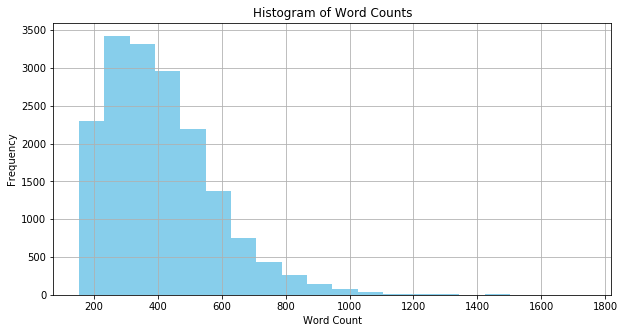

In [9]:
# Tokenize the text and count word occurrences
word_counts = []
for text in train['full_text']:
    tokens = word_tokenize(text)
    word_counts.extend(tokens)

# Generate a histogram of word counts
plt.figure(figsize=(10, 5))
plt.hist([len(word_tokenize(text)) for text in train['full_text']], bins=20, color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts')
plt.grid(True)
plt.show()

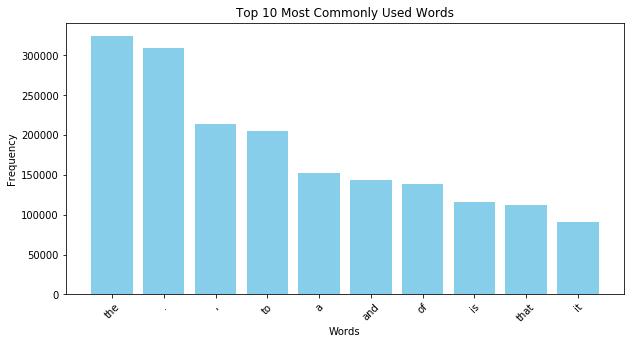

In [10]:
# Generate a bar chart showing the most commonly used words
fdist = FreqDist(word_counts)
top_words = fdist.most_common(25)  # Change 25 to the number of top words you want to display
words, frequencies = zip(*top_words)
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Commonly Used Words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Remove any stop words according to the word frequencies

In [26]:
# Clean the text by removing unnecessary information and lower
def filter_websites(text):
    pattern = r'(http\:\/\/|https\:\/\/)?([a-z0-9][a-z0-9\-]*\.)+[a-z][a-z\-]*'
    return re.sub(pattern, '', text)

def filter_phone_numbers(text):
    pattern = r'(?:(?:\+|00)33[\s.-]{0,3}(?:\(0\)[\s.-]{0,3})?|0)[1-9](?:(?:[\s.-]?\d{2}){4}|\d{2}(?:[\s.-]?\d{3}){2})|(\d{2}[ ]\d{2}[ ]\d{3}[ ]\d{3})'
    return re.sub(pattern, '', text)

def filter_emails(text):
    pattern = r'(?:(?!.*?[.]{2})[a-zA-Z0-9](?:[a-zA-Z0-9.+!%-]{1,64}|)|\"[a-zA-Z0-9.+!% -]{1,64}\")@[a-zA-Z0-9][a-zA-Z0-9.-]+(.[a-z]{2,}|.[0-9]{1,})'
    return re.sub(pattern, '', text)

def remove_newlines(text):
    return text.replace("\n", "")

def clean_text(text):
    text = text.lower()
    #text = filter_websites(text)
    #text = filter_phone_numbers(text)
    #text = filter_emails(text)
    text = remove_newlines(text)
    return text

In [27]:
train['cleaned_full_text'] = train.full_text.apply(clean_text)
test['cleaned_full_text'] = test.full_text.apply(clean_text)

In [28]:
train.head()

,essay_id,full_text,score,cleaned_full_text
0,000d118,Many people have car where they live. The thin...,3,many people have car where they live. the thin...
1,000fe60,I am a scientist at NASA that is discussing th...,3,i am a scientist at nasa that is discussing th...
2,001ab80,People always wish they had the same technolog...,4,people always wish they had the same technolog...
3,001bdc0,"We all heard about Venus, the planet without a...",4,"we all heard about venus, the planet without a..."
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"dear, state senatorthis is a letter to argue i..."


In [30]:
train.to_csv('./data/train_cleaned.csv', index=False)
test.to_csv('./data/test_cleaned.csv', index=False)